#Logistic Regression in Practice for Multi-class Classification

In this session, we shall apply logistic regression and look at predictions using it.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet.

In [ ]:
from sklearn.datasets import load_iris  #importing the load_iris class
iris_data = load_iris() #loading the iris dataset in iris_data

print(iris_data['DESCR']) #checking out the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris_data['data'][:,:2]
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

From the description, it is clear that *iris* dataset consists of essentially 3 classes: *Iris-Setosa*, *Iris-Versicolour*, *Iris-Virginica*. As logistic regression has been introduced as a binary classifier, we can alter the data into a binary classification problem based on finding whether a flower belongs to *Iris-Virginica* or not. In order to do that, we change the labels $\{0,1\}$ to $0$ and 2 to 1.

In [ ]:
y = iris_data['target'] 
num_classes = len(np.unique(y))
min_class_label = np.min(y)
print('num classes:', num_classes, 'minimum class:', min_class_label)
print('labels:',y)

num classes: 3 minimum class: 0
labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train_scikitlearn = X_train
X_train = X_train

y_train = y_train
print('Size of training set:', len(X_train))
n = len(X_train)
print('Size of testing set:', len(X_test))
print('y train:')
print(y_train)
print('y test:')
print(y_test)

Size of training set: 120
Size of testing set: 30
y train:
[1 2 1 2 2 0 1 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0
 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1
 1 0 1 0 0 2 2 2 0 0 1 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0
 2 1 2 1 2 2 1 2 0]
y test:
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]


Assume that we have a random variable $X$ whose realization is $x$ a $d$-dimensional data:  
$
{x}=
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots\\
x_d
\end{bmatrix}$.
Now we want to model the response variable $Y$ using logistic regression. 

For multiclass classification, we assume that $Y$ takes its values from the set $\{1,2,3,\ldots,K\}$.

Hence for multiclass classification, we will use $E[Y=k|X={x}] = p(k;\mathbf{x})$. 

To model $p(k;{x})$ for each class label $k$, we use distinct parameter vector 
${\mathbf{w}}_k=(w_{k1}, w_{k2}, w_{k3}, \ldots, w_{kd}, w_{k0})$. 

Extending the idea from two-class classification, we write $p(k;{x})$ as:
$
p(k;{x})=  \frac{\exp^{\left(w_{k0} + w_{k1} x_1 + w_{k2} x_2 + \ldots + w_{kd} x_d\right)}} {\sum_{j=1}^{K} \exp^{\left(w_{j0} + w_{j1} x_1 + w_{j2} x_2 + \ldots + w_{jd} x_d\right )} }.
$

The function used to model $p(k;{x})$ is called a $\color{red}{\textbf{softmax}}$ function. 

If we denote $p(k;{x})$ simply as $p_k$ and if we have the notations $\mathbf{x}=\begin{bmatrix}
x \\ 1
\end{bmatrix} = \begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_d \\ 1
\end{bmatrix}, {\mathbf{w}}_k=\begin{bmatrix}
w_{k1} \\ w_{k2} \\ \vdots \\ w_{kd} \\ w_{k0}
\end{bmatrix}$
then we can write:

$
\begin{align}
p_k = \frac{\exp^{{{\mathbf{w}}_k}^\top \mathbf{x}}}{\sum_{j=1}^{K}\exp^{{{\mathbf{w}}_j}^\top \mathbf{x}}}.
\end{align}
$

$\Large{\text{Likelihood function}}$ 

We will now define a quantity useful in the estimation of the parameters ${\mathbf{w}}_k$ used to model $p_k$.

Note that $p_k$ represents the probability that $x$ is categorized to label $k$. 

Also note that $\sum_{j=1}^{K} p_j = 1$. Thus $p_k$'s define a discrete probability distribution. 

In the training data set however, we are given $y^i \in \{1,2,3,\ldots,K\}$. To represent $y^i$ as probabilities, we shall use an equivalent representation as: 

$
{\mathbf{y}}^i = \begin{bmatrix}
y^i_1 \\
y^i_2 \\
\vdots\\
y^i_K
\end{bmatrix}
$,
where $y^i_k = 1$ if $y^i=k$ and $y^i_j = 0$ for all other $j \neq k$. 


Given an observation $X=x=\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_d
\end{bmatrix}$ 
we define the $\textbf{likelihood function}$ as: 

$
L(y;p,x) = \Pi_{j=1}^{K} {(p_j)}^{y_j}
$

where recall that $p_k=p(k;x)=\frac{\exp^{{{\mathbf{w}}_k}^\top \mathbf{x}}}{\sum_{j=1}^{K}\exp^{{{\mathbf{w}}_j}^\top \mathbf{x}}}$. 

Then observe that the natural goal is to maximize the likelihood function with respect to parameters ${\mathbf{w}}_k, k=1,2,\ldots,K$. 

Now given a data set $D$ containing $n$ observations of the form $\{({x}^1,y^1), ({x}^2,y^2), \ldots, ({x}^n,y^n)\}$, and assuming that the pairs $({x}^i,y^i)$ are independent observations, then it is possible to extend the likelihood function using the equivalent label representations ${\mathbf{y}}^i$: 

$
\begin{align}
L({\mathbf{y}}^1,\ldots,{\mathbf{y}}^n;p^1,\ldots,p^n) = \Pi_{i=1}^{n} \Pi_{j=1}^{K} {\left(p^i_j\right)}^{y^i_j}.
\end{align}
$

We can now write the $\textbf{log likelihood}$ function as:

$
\begin{align}
\ln L({\mathbf{y}}^1,\ldots,{\mathbf{y}}^n;p^1,\ldots,p^n) = \sum_{i=1}^{n} \sum_{j=1}^{K} y^i_j \ln {(p^i_j)}.
\end{align}
$

Since natural log function is monotonic, maximizing the likelihood function is equivalent to maximizing the log likelihood function. 

Hence the concerned optimization problem is: 

$
\max\limits_{{\mathbf{w}}_1,{\mathbf{w}}_2,\ldots,{\mathbf{w}}_K} \ln L({\mathbf{y}}^1,\ldots,{\mathbf{y}}^n;p^1,\ldots,p^n)= \sum_{i=1}^{n} \sum_{j=1}^{K} y^i_j \ln {(p^i_j)}.
$

Note that $p^i_j = p(j;x^i) = \frac{\exp^{{{\mathbf{w}}_j}^\top {\mathbf{x}}^i}}{\sum_{k=1}^{K}\exp^{{{\mathbf{w}}_k}^\top {\mathbf{x}}^i}}, \forall i = 1,\ldots,n$.



$\Large{\text{Solving the likelihood maximization problem}}:$

To solve 

$
\max\limits_{{\mathbf{w}}_1,{\mathbf{w}}_2,\ldots,{\mathbf{w}}_K} \ln L({\mathbf{y}}^1,\ldots,{\mathbf{y}}^n;p^1,\ldots,p^n)= \sum_{i=1}^{n} \sum_{j=1}^{K} y^i_j \ln {(p^i_j)}.
$

we can find the gradient of the objective function with respect to ${\mathbf{w}}_k$ as:

$
\begin{align}
\nabla_{{\mathbf{w}}_k} {\ln L} =  \begin{bmatrix}
\frac{\partial{ \ln L }} {\partial w_{k1}} \\
\frac{\partial{ \ln L }} {\partial w_{k2}} \\
\vdots \\
\frac{\partial{ \ln L }} {\partial w_{kd}} \\
\frac{\partial{ \ln L }} {\partial w_{k0}} 
\end{bmatrix}
&= \sum_{i=1}^{n} \sum_{j=1}^{K} \frac{y^i_j}{p^i_j} \nabla_{{\mathbf{w}}_k} {(p^i_j)}  \\ 
\end{align}
$

where $\nabla_{{\mathbf{w}}_k} {(p^i_j)} = \nabla_{{\mathbf{w}}_k}  \left (\frac{\exp^{{{\mathbf{w}}_j}^\top {\mathbf{x}}^i}}{\sum_{m=1}^{K}\exp^{{{\mathbf{w}}_m}^\top {\mathbf{x}}^i}}\right )$.

$\large{\text{Exercise:}}$
Show that the gradient of objective with respect to ${{\mathbf{w}}_k}$ is:

$
\begin{align}
\nabla_{{\mathbf{w}}_k} {\ln L} &=  \sum_{i=1}^{n} \left(y^i_k - p^i_k \right ){\mathbf{x}}^i
\end{align}
$

$\Large{\text{Solving the regularized likelihood maximization problem}}:$

We can add a $\ell_2$ regularizer to the objective function as below: 

$
\begin{align}
\max\limits_{{\mathbf{w}}_1,{\mathbf{w}}_2,\ldots,{\mathbf{w}}_K} F({\mathbf{w}}_1,{\mathbf{w}}_2,\ldots,{\mathbf{w}}_K) &= -\frac{\lambda}{2} \sum_{j=1}^{K}\|{\mathbf{w}}_j\|_2^2 + \ln L({\mathbf{y}}^1,\ldots,{\mathbf{y}}^n;p^1,\ldots,p^n) \\ &= -\frac{\lambda}{2} \sum_{j=1}^{K}\|{\mathbf{w}}_j\|_2^2 + \sum_{i=1}^{n} \sum_{j=1}^{K} y^i_j \ln {(p^i_j)}.
\end{align}
$

Here $\lambda>0$ is a regularization constant.

Note that the regularizer term added has a negative sign to maintain the concavity of the objective function. $\color{red}{\textbf{(Check why this is done!)}}$

The gradient of the regularized objective function becomes:

$
\begin{align}
\nabla_{{\mathbf{w}}_k} F 
&= -\lambda {{\mathbf{w}}_k} + \nabla_{{\mathbf{w}}_k} {\ln L} \\
&= -\lambda {{\mathbf{w}}_k} + \sum_{i=1}^{n} \left(y^i_k - p^i_k \right ){\mathbf{x}}^i
\end{align}
$

We can adopt an iterative procedure as follows to find the optimal ${{\mathbf{w}}_k}$ for $k \in \{1,2,3,\ldots,K\}$. 

$\large{\text{Gradient ascent for solving the likelihood maximization problem}}:$

$
\begin{align}
&\textbf{Step 0:}  \text{Input data set $D$, tolerances $\epsilon_1, \epsilon_2$, regularization constant $\lambda > 0$.} \\
&\textbf{Step 1:}  \text{Start with arbitrary ${{\mathbf{w}}_k}, k \in \{1,2,3,\ldots,K\}$.} \\
&\textbf{Step 2:}  \text{For $k=1,2,\ldots$} \\
&\quad \quad \textbf{Step 2.1:} \text{Compute gradient $\nabla_{{\mathbf{w}}_k} F 
= -\lambda {{\mathbf{w}}_k} + \nabla_{{\mathbf{w}}_k} \ln L, k \in \{1,2,3,\ldots,K\}$}. \\
&\quad \quad \textbf{Step 2.2:}  \text{Compute step length $\eta$ using line search procedure} \\
&\quad \quad \textbf{Step 2.3:}  {{\mathbf{w}}_k} = {{\mathbf{w}}_k} + \eta_k \nabla_{{\mathbf{w}}_k} F, \forall k \in \{1,2,3,\ldots,K\} \\
&\quad \quad \textbf{Step 2.4:}  \text{if $\sum_{k\in \{1,2,\ldots,K\}} \| \nabla_{{\mathbf{w}}_k} F\|_2 \leq \epsilon_1$ break from loop} \\
&\quad \quad \textbf{Step 2.5:}  \text{if relative change in function value is $\leq \epsilon_2$ break from loop} \\
&\textbf{Step 3:}  \text{ Output ${{\mathbf{w}}_k}, k \in \{1,2,3,\ldots,K\}$}
\end{align}
$

Note that $\eta_k$ denotes the learning rate. 


$\large\text{Preparing the data matrix so that the last column is a column  of ones}$

In [ ]:
#add a column of ones
X_train = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_train

array([[6.1, 3. , 1. ],
       [7.7, 3. , 1. ],
       [5.6, 2.5, 1. ],
       [6.4, 2.8, 1. ],
       [5.8, 2.8, 1. ],
       [5.3, 3.7, 1. ],
       [5.5, 2.3, 1. ],
       [5.2, 3.4, 1. ],
       [6.5, 2.8, 1. ],
       [6.7, 2.5, 1. ],
       [6.8, 3. , 1. ],
       [5.1, 3.5, 1. ],
       [6. , 2.2, 1. ],
       [6.3, 2.9, 1. ],
       [6.6, 2.9, 1. ],
       [7.7, 2.6, 1. ],
       [5.7, 3.8, 1. ],
       [5. , 3.6, 1. ],
       [4.8, 3. , 1. ],
       [5.2, 2.7, 1. ],
       [5.1, 3.4, 1. ],
       [5.5, 3.5, 1. ],
       [7.7, 3.8, 1. ],
       [6.9, 3.1, 1. ],
       [7.3, 2.9, 1. ],
       [6.4, 2.8, 1. ],
       [6.2, 2.8, 1. ],
       [6. , 3.4, 1. ],
       [7.7, 2.8, 1. ],
       [5.7, 3. , 1. ],
       [4.8, 3.4, 1. ],
       [5.7, 2.5, 1. ],
       [6.3, 2.7, 1. ],
       [4.8, 3. , 1. ],
       [4.7, 3.2, 1. ],
       [6.5, 3. , 1. ],
       [4.6, 3.4, 1. ],
       [6.1, 3. , 1. ],
       [6.5, 3.2, 1. ],
       [6.7, 3.1, 1. ],
       [5.7, 2.8, 1. ],
       [6.7, 3.3

$\Large{\text{Computing } \mathbf{w} \text{ for the training data set}}:$

In [ ]:
import numpy as np
I_num_classes = np.eye(num_classes)
def one_hot_encode(y_label, min_class_label): #argument y_label should be an int or float
  return I_num_classes[int(y_label-min_class_label)]

def logSumExp(scores):
    max = np.max(scores)
    ds = scores - max
    sumOfExp = np.exp(ds).sum()
    return max + np.log(sumOfExp)

def compute_p_y(x, w):
    score_denom = 0.
    class_scores = np.zeros(num_classes)
    for j in np.arange(num_classes):
      class_scores[j] = np.exp(np.dot(w[j], x))
    class_probs = np.exp(class_scores-logSumExp(class_scores))
    return class_probs

#computing log likelihood function
def log_likelihood(X, y, w, lambda_):
  n = X.shape[0]
  #print('n:',n)
  min_class_label = np.min(np.unique(y))
  #print('min classlabel:',min_class_label)
  log_likelihood = 0.0
  for i in range(n):
    x_i = X[i] #access i-th feature row
    #y_i_onehot = one_hot_encode(y[i],v) #access i-th label in one hot encoded form
    p_i =  compute_p_y(x_i, w)[y[i]-min_class_label]#probability with the current w
    #print('y:',y[i],'p_i:',p_i)
    log_likelihood += np.log(p_i) #y_i_onehot is one only for coordinate y[i]  
  return log_likelihood

def compute_regularized_objective(X,y,w,lambda_):
  num_classes = len(np.unique(y))
  reg_term = 0.
  for j in np.arange(num_classes):
    reg_term+=np.linalg.norm(w[j])**2
  reg_term*=lambda_
  log_likelihood_term = log_likelihood(X, y, w, lambda_)
  obj = -reg_term+log_likelihood_term
  return obj

In [ ]:
#computing gradient of objective function with respect to beta
def compute_gradient(X, y, w, lambda_):
  num_classes = len(np.unique(y))
  n = X.shape[0]
  gradient = np.zeros( (num_classes, X.shape[1]) )
  for i in range(n):
    x_i = X[i] #access i-th feature row
    y_i_onehot = one_hot_encode(int(y[i]),min_class_label) #access i-th label in one hot encoded form
    probs_i =  compute_p_y(x_i, w) #probability with the current w
    for j in np.arange(num_classes):
      #print('y_i:',y[i],'y_i_onehot[',j,']:',y_i_onehot[j],'probs_i[',j,']:',probs_i[j])
      gradient[j] = np.add(gradient[j], (y_i_onehot[j] - probs_i[j])*x_i) 
  #if you have regularizer, the gradient needs to be updated with the gradient of regularizer term
  for j in np.arange(num_classes):
    gradient[j] = np.add(gradient[j], -lambda_*w[j])
  return gradient

In [ ]:
#cross-check compute_gradient and log_likelihood functions
w = np.zeros( (num_classes, X_train.shape[1]) )
lambda_ = 1.0
print(X_train[0])
print(w)
for k in np.arange(num_classes):
  print(np.exp(np.dot(X_train[0],w[k])))
print('log likelihood:',log_likelihood(X_train,y_train, w, lambda_))
print('regularized objective function value:',compute_regularized_objective(X_train,y_train, w, lambda_))
print('gradient:',compute_gradient(X_train,y_train, w, lambda_))

[6.1 3.  1. ]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
1.0
1.0
1.0
log likelihood: -131.833474640173
regularized objective function value: -131.833474640173
gradient: [[-40.03333333  10.53333333  -1.        ]
 [-13.53333333 -19.66666667  -3.        ]
 [ 53.56666667   9.13333333   4.        ]]


In [ ]:
#gradient ascent for likelihood maximization 
w = np.zeros( (num_classes, X_train.shape[1]) )

max_iter = 500000
eps_1 = 1e-6 #tolerance for gradient norm
eps_2 = 1e-9 #tolerance for relative function value difference

lambda_ = 1.0 

f_val = compute_regularized_objective(X_train,y_train, w, lambda_)

#store the objective function values for plotting purposes
f_val_list = [] 
f_val_list.append(f_val)

print('Initial values: w:', w, ' log likelihood:', f_val)
#the loop 
for k in range(max_iter):
  
  #compute gradient of objective function with respect to w
  grad_w = compute_gradient(X_train, y_train, w, lambda_)
  
  lr = 0.0001 #we use a constant step length (or) learning rate

  grad_norm = 0.0
  #update w
  for j in np.arange(num_classes): 
    w[j] = np.add(w[j], lr*grad_w[j])
    grad_norm += np.linalg.norm(grad_w[j])
  
  #print('k: ', k, ' grad w: ', grad_w,  'w:',w)
  f_val = compute_regularized_objective(X_train,y_train, w, lambda_)
  f_val_list.append(f_val)

  rel_change_in_fval = np.abs(f_val - f_val_list[-2])/((f_val_list[-2])+1e-15)

  if k%10000+1 == 1:
    print('k: ', k,  ' w:', w, ' grad norm:', grad_norm, 'Objective function value:', f_val)
  if grad_norm <= eps_1: #or rel_change_in_fval <= eps_2:
    break
print('Final: k: ', k,  ' w:', w, ' grad norm:', grad_norm, 'Objective function value:', f_val)

Initial values: w: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]  log likelihood: -131.833474640173
k:  0  w: [[-4.00333333e-03  1.05333333e-03 -1.00000000e-04]
 [-1.35333333e-03 -1.96666667e-03 -3.00000000e-04]
 [ 5.35666667e-03  9.13333333e-04  4.00000000e-04]]  grad norm: 119.95564458246145 Objective function value: -131.3402718346996
k:  10000  w: [[-1.54416149  2.50369422  0.57700848]
 [ 0.69953511 -1.34979759  0.41137393]
 [ 0.84462637 -1.15389663 -0.98838242]]  grad norm: 0.6119467665345746 Objective function value: -76.17562200177059
k:  20000  w: [[-1.56743997  2.51913556  0.6552061 ]
 [ 0.70326453 -1.36997671  0.45869822]
 [ 0.86417545 -1.14915885 -1.11390432]]  grad norm: 0.09902068950764475 Objective function value: -76.05312510896428
k:  30000  w: [[-1.56942274  2.51470465  0.67992771]
 [ 0.70298676 -1.36941256  0.45917659]
 [ 0.86643598 -1.14529209 -1.1391043 ]]  grad norm: 0.027763428861577243 Objective function value: -76.04333822486585
k:  40000  w: [[-1.56997966  2.51303997  0

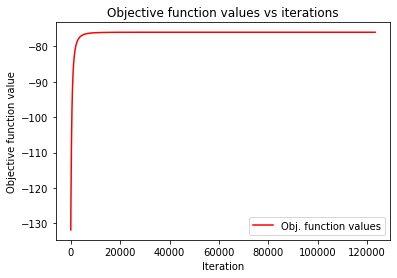

In [ ]:
#plot the function values during optimization 
plt.plot( f_val_list, '-r', label='Obj. function values')
plt.title("Objective function values vs iterations")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.legend(loc='lower right')
#plt.grid()
plt.show()

In [ ]:
def compute_accuracy(X,y,w):
  num_correct_predicted = 0
  n = X.shape[0]
  min_class_label = np.min(y)
  for i in range(n):
      x_i = X[i] #access i-th feature row
      y_i_onehot = one_hot_encode(int(y[i]), min_class_label) #access i-th label in one hot encoded form
      probs_i =  compute_p_y(x_i, w) #probability with the current w
      pred_i = np.argmax(probs_i)
      #print('y_i:',y[i],'pred_i:',pred_i,'probs:',probs_i)
      num_correct_predicted += (pred_i==y[i])
  #print('Accuracy:',num_correct_predicted/n)
  return (num_correct_predicted/n)

In [ ]:
print('Train accuracy:',compute_accuracy(X_train, y_train, w))

X_test = np.hstack((X_test,np.ones((X_test.shape[0],1))))
print('Test accuracy:',compute_accuracy(X_test, y_test, w))

Train accuracy: 0.7916666666666666
Test accuracy: 0.7666666666666667
